In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("measurement_datamart.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647511 entries, 0 to 647510
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Measurement_date  647511 non-null  object 
 1   Measurement_time  647511 non-null  object 
 2   Station code      647511 non-null  int64  
 3   Address           647511 non-null  object 
 4   District          647511 non-null  object 
 5   Latitude          647511 non-null  float64
 6   Longitude         647511 non-null  float64
 7   SO2               647511 non-null  float64
 8   NO2               647511 non-null  float64
 9   O3                647511 non-null  float64
 10  CO                647511 non-null  float64
 11  PM10              647511 non-null  int64  
 12  PM2.5             647511 non-null  int64  
 13  WHO_Air_Quality   647511 non-null  object 
dtypes: float64(6), int64(3), object(5)
memory usage: 69.2+ MB


In [3]:
df.describe()

,Station code,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5,AQI_index
count,647511.000000,647511.000000,647511.000000,647511.000000,647511.000000,647511.000000,647511.000000,647511.000000,647511.000000,647511.000000
mean,113.000221,37.553484,126.989340,-0.001795,0.022519,0.017979,0.509197,43.708051,25.411995,43.009542
std,7.211315,0.053273,0.078790,0.078832,0.115153,0.099308,0.405319,71.137342,43.924595,59.324561
min,101.000000,37.452357,126.835151,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.700000
25%,107.000000,37.517528,126.927102,0.003000,0.016000,0.008000,0.300000,22.000000,11.000000,18.300000
50%,113.000000,37.544962,127.004850,0.004000,0.025000,0.021000,0.500000,35.000000,19.000000,31.700000
75%,119.000000,37.584848,127.047470,0.005000,0.038000,0.034000,0.600000,53.000000,31.000000,51.000000
max,125.000000,37.658774,127.136792,3.736000,38.445000,33.600000,71.700000,3586.000000,6256.000000,6406.000000


# Analis dan Perhitungan


In [ ]:
from scipy.stats import pearsonr


# membuat dataframe untuk menyimpan p-value
p_values = pd.DataFrame(index=polutan, columns=polutan)

# loop untuk menghitung p-value antar semua polutan
for col1 in polutan:
    for col2 in polutan:
        if col1 == col2:
            p_values.loc[col1, col2] = 0  # p-value untuk diri sendiri = 0
        else:
            corr, pval = pearsonr(df[col1], df[col2])
            p_values.loc[col1, col2] = pval

# convert semua nilai ke float
p_values = p_values.astype(float)

print("P-Values:")
print(p_values)


P-Values:
                 SO2  NO2             O3   CO           PM10          PM2.5
SO2     0.000000e+00  0.0   0.000000e+00  0.0   0.000000e+00  2.016776e-320
NO2     0.000000e+00  0.0   0.000000e+00  0.0   0.000000e+00   0.000000e+00
O3      0.000000e+00  0.0   0.000000e+00  0.0  5.386451e-212  1.231663e-163
CO      0.000000e+00  0.0   0.000000e+00  0.0   0.000000e+00   0.000000e+00
PM10    0.000000e+00  0.0  5.386451e-212  0.0   0.000000e+00   0.000000e+00
PM2.5  2.016776e-320  0.0  1.231663e-163  0.0   0.000000e+00   0.000000e+00


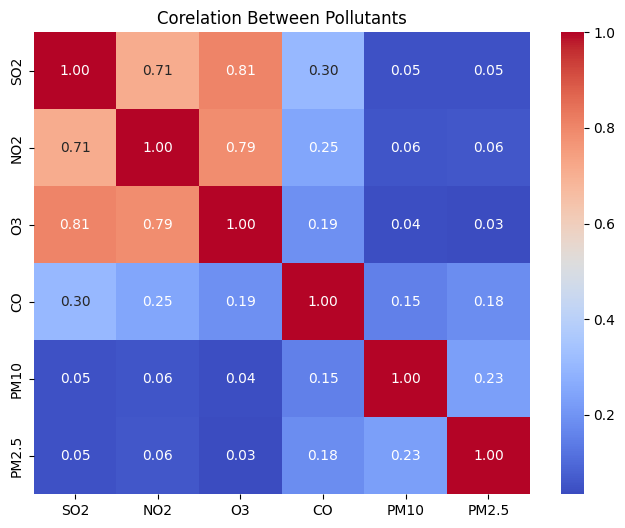

In [ ]:
# plot heatmap korelasi antar polutan
plt.figure(figsize=(8,6))
sns.heatmap(korelasi, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Corelation Between Pollutants')
plt.show()

kesimpulan (masukin ppt)

1. SO2, NO2, dan O3 menunjukkan hubungan yang sangat kuat, mengindikasikan bahwa mereka kemungkinan berasal dari sumber pencemaran yang sama dan bisa saling mempengaruhi secara kimiawi di atmosfer.

2. Partikulat (PM10 dan PM2.5) menunjukkan hubungan yang lemah dengan gas polutan, yang berarti perlu pendekatan berbeda dalam mengendalikannya.

Insights = - Dapat dilakukannya efisiensi barang
            - Setiap jenis polutan punya sumber, karakteristik, dan perilaku atmosferik yang berbeda-beda, sehingga strategi pengendaliannya juga harus spesifik dan tidak bisa disamaratakan

----


dari data visualisasi di atas dapat disimpulkan bahwa:
1. SO2, NO2, dan O3 saling berkolerasi, di mana ketika konsentrasi salah satu dari ketiga polutan gas tersebut meningkat, kemungkinan besar dua lainnya jug akan meningkat. Ini bisa terjadi karena sumber polutan tsb berasal dari sumber yang sama seperti emisi kendraan bermotor dan pembakaran industri.

2. PM10 dan PM2.5 memiliki korelasi yang sedang. Di mana partikulat ini tidak hanya dari emisi kendaraan melainkan bisa bisa lebih dipengaruhi oleh aktivitas fisik seperti konstruksi, debu jalan, atau pembakaran biomassa.

3. CO tidak memiliki korelasi terhadap apapun.

Insights = Jika melihat hasil korelasi antara SO2, No2 dengan O3. Dapat dilakukannya efisiensi barang di mana, tiap station hanya perlu 1 alat dari ketiga tsb, karena salah satu dari 3 polutan tsb sudah dapat mengidentifikasi polutan lainnya. Manajemen kualitas udara yang efektif harus mempertimbangkan kelompok polutan secara terpisah, karena tidak semua polutan bergerak secara bersamaan atau disebabkan oleh hal yang sama.

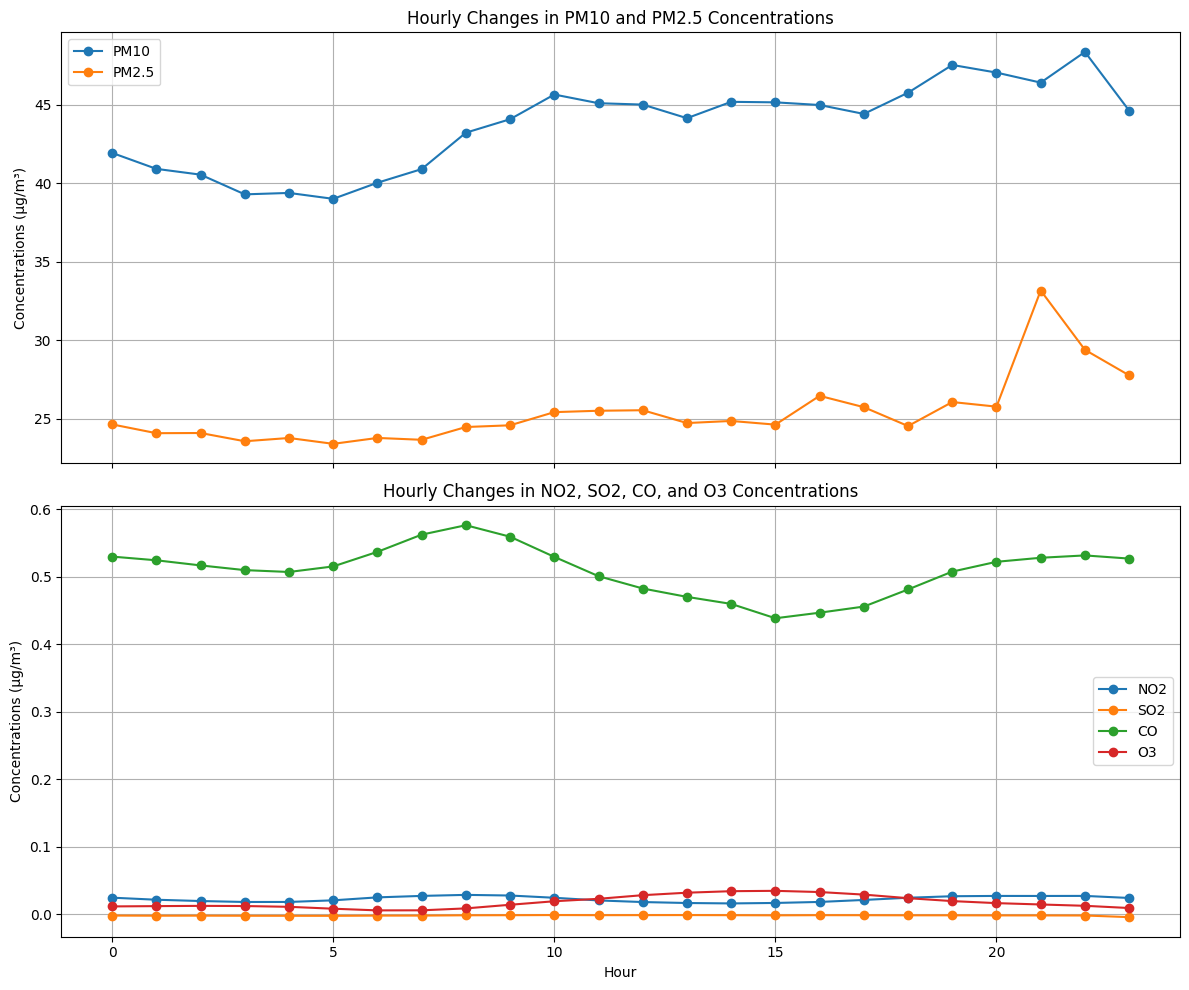

In [ ]:
# setup plot
fig, axs = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# membuat plot untuk PM10 dan PM2.5
axs[0].plot(hourly_avg['Hour'], hourly_avg['PM10'], label='PM10', marker='o')
axs[0].plot(hourly_avg['Hour'], hourly_avg['PM2.5'], label='PM2.5', marker='o')
axs[0].set_title('Hourly Changes in PM10 and PM2.5 Concentrations')
axs[0].set_ylabel('Concentrations (µg/m³)')
axs[0].legend()
axs[0].grid()

# plot untuk NO2, SO2, CO, O3
for pol in ['NO2', 'SO2', 'CO', 'O3']:
    axs[1].plot(hourly_avg['Hour'], hourly_avg[pol], label=pol, marker='o')

axs[1].set_title('Hourly Changes in NO2, SO2, CO, and O3 Concentrations')
axs[1].set_xlabel('Hour')
axs[1].set_ylabel('Concentrations (µg/m³)')
axs[1].legend()
axs[1].grid()

plt.tight_layout()
plt.show()


-----


dari data visualisasi di atas dapat disimpulkan

1. PM10: Cenderung meningkat secara perlahan sepanjang hari, dari sekitar 41 µg/m³ di pagi hari menuju puncak di sore-malam hari (sekitar pukul 21–23), mendekati 48 µg/m³.
    PM2.5: Relatif stabil di angka 24–26 µg/m³, lalu mengalami lonjakan signifikan antara pukul 21–22 (hingga ~33 µg/m³), sebelum menurun sedikit.

 Interpretasi:
Peningkatan malam hari bisa dikaitkan dengan peningkatan aktivitas kendaraan atau pembakaran, dan juga stagnasi udara (kurangnya angin malam). Lonjakan mendadak PM2.5 menunjukkan kemungkinan adanya sumber emisi lokal spesifik (seperti pembakaran sampah, aktivitas rumah tangga, atau industri malam).

2. 
NO₂ dan CO: Menunjukkan pola serupa, meningkat di pagi hari (jam 6–10), lalu menurun pada siang dan kembali meningkat di malam. Ini sesuai dengan jam sibuk kendaraan bermotor (rush hour).

SO₂:Relatif stabil di kisaran rendah sepanjang hari.

O₃ (Ozon): Naik siang hari (jam 10–15) dan turun setelahnya. Ini logis karena O₃ terbentuk melalui reaksi fotokimia akibat cahaya matahari dan prekursor gas (NOx & VOCs).

Interpretasi:

O₃ tergantung pada matahari, berbeda dari polutan lain.
NO₂ dan CO cenderung mengikuti aktivitas manusia (lalu lintas, pembakaran), O₃ malah muncul dari reaksi sekunder.

PM10 dan PM2.5 tidak sepenuhnya selaras dengan gas seperti NO₂ atau O₃.Ini mendukung heatmap korelasi sebelumnya: polutan gas vs partikulat punya karakteristik terpisah.

Polutan Gas (NO₂, CO) → indikator aktivitas manusia, terutama transportasi.
O₃ → indikator reaksi atmosferik, bukan langsung dari sumber emisi.
Lonjakan PM2.5 di malam → perlu diselidiki lebih lanjut; bisa jadi akibat aktivitas domestik/industri malam atau fenomena atmosferik lokal
